In [63]:
import pandas as pd
import numpy as np


course dataset repository: https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/
bike_rentals.csv. This version has been edited to remove unnecessary columns and has altered some
values to make preprocessing easier.
The dataset contains data from 2 years of bicycle rental data. Each row represents an hour of a day, and
contains several attributes about the rental time including the season, weather, and what kind of day it is
(working day and holiday). It also contains a “count” column, which indicates the number of bikes rented
over the hour.
Note that the “temp” column contains the actual temperature in Celsius, and “atemp” contains an
estimate of the sensation of temperature in Celsius.


### 1 Analysis 
Perform a basic exploratory analysis of the dataset. The goal of this analysis should be to identify whether
each column is continuous or categorical.
1. Are there any missing values?
> No

2. Regardless of your answer above, would missing values be a problem for clustering? Why or why not?
> Missing values would be a problem for clustering because when it comes to categorizing and creating the different clusters, the missing values would impact on the mean calculations of the clusters. Incorrectly assigning data points.


3. Which columns contain continuous values? For these columns, use describe() to show basic summary
statistics about them.

Floating Continuous values are:

> temp, atemp, windspeed.

Integer Continuous values are:
Year, Hour, humidity, Count


4. Which columns contain categorical values? Use value counts() to show the unique values contained
in each column, and how often they appear.


5. Of the categorical columns, which contain binary yes/no values? What do the yes/no values mean?

> holiday (yes: True, no: False) and workingday (0: False/1: True).
> true | False: Means if it is a holiday or not.
> 1 | 0: Means if it is a working day or not.

### 2 Preprocessing (6 points)
Perform any steps necessary to preprocess the dataset to prepare it for clustering. This could include one-hot
encoding, producing binary 0/1 values, or standardizing with Z-score normalization.


#### 3 K=2 (8 points)
Perform K-means clustering with K=2 (3 points). Answer the following questions:


6. (1 point) How many different rental periods are represented in each cluster?

> Rentai perdios in Cluster 1 (0): 17 Hours
> Rental periods in Cluster 2 (1): 24 Hours

7. (4 points) Using averaged columns within each cluster, give a profile of a low-count rental period and a high-count rental period. Why do you think fewer people are renting bikes in the low-count rental period?

> Given the profiles, the low-count pental period seems to be located at Cluster 1. With an average of rental count of 99. While on cluster 0 seems to posses a mean count of 437

Significant Differences from Categorical Columns:

|                | Cluster 0 | Cluster 1 | Inisghts                                                    |
| -------------- | --------- | --------- | ----------------------------------------------------------- |
| Mean Count     | 437       | 99        | Cluster 0, (yellow) has a higher count of rentals.          |
| weather_bad    | 0.03      | 0.09      | Bad weather seems to associate with low rentals.            |
| season_winter  | 0.09      | 0.3       | Winter season seems to associate with low rentals.          |
| seasons summer | 0.34      | 0.21      | Summer season seems to somehow associate with high rentals. |
| Season Spring  | 0.3       | 0.22      | Spring season seems to associate with high rentals.         |

What surprised me::
- In autum, there is almost no difference
- working day and holiday seems to have almost no impact on the rental count.

For Continuous Data differences can be seen in: 

- temp
- humidity
- aTemp
- windspeed
- hour


Why do you think fewer people are renting bikes in the low-count rental period?

By plotting in a scatter plot, we can see interestingly that there is a range of prefered continous values.
- Seems that more rentings appear during the time range: 7-21
- More rentings during the mid ranging temperatures and humidity
  - Temperature ranging 10-35
  - Humidity ranging 20-80
- For Humidity and Temperature ranges, it could ALSO be that extreme humidity and temperatures are also less frequent in nature, thus less recordings appear.
- Less Windspeed seems to associate with more rentals.
  - Ranging 0-30 mainly while extreme values are not prefered.




**Reasons why they rent less during those parameters:**

- Temperature & Seasons: Extreme temperatures are not prefered. And this are associated. This also shows whereas: Spring and Summer are prefered. While Winter not, and autum doesn't seem to have a significant impact. Might make sense as colder temperatures, might make cycling less confortable, perhaps more dangerous as roads might be frozen.
- Humidity Mid ranging humidity seems to be prefered. While extreme values are not. Makes sense for people to prefer milder levels of Humidity.
- Windspeed: Less windspeed seems to associate with more rentals. While extreme values are not prefered. Too much wind might make cycling less confortable, and more dangerous as well.


### 4 K=3 (10 points)
Perform K-means clustering with K=3 (3 points). Answer the following questions:



8. (1 point) How many different rental periods are represented in each cluster?

| Cluster | Periods |
| ------- | ------- |
| 0       | 14      |
| 1       | 24      |
| 22      | 20      |

9.  (4 points) Using averaged columns within each cluster, give a profile of a low-count rental period and
a high-count rental period. Why do you think fewer people are renting bikes in the low-count rental
period?


|               | Cluster 0 (High) | Cluster 1 (Low) | Cluster 2 (mid+) | Insights                                                  |
| ------------- | ---------------- | --------------- | ---------------- | --------------------------------------------------------- |
| Mean Count    | 566              | 59              | 263              | I would consider 0 and 2 as high rentals                  |
| Season Summer | 0.366914         | 0.201020        | 0.292729         | Summer seems to associate with high rentals.              |
| Season Winter | 0.076352         | 0.345229        | 0.154930         | Winter seems to associate with low rentals significantly. |


**No significant difference**

- Season Autum
- Weather good
- Weather moderate
- Holiday Not
- Holiday yes


**Continuous to look at**

- Hour
- Temp
- aTemp
- Humidity
- Windspeed


> Based on the analysis it seems to capture a very similar image from the last question. Usin k=2.



1.  (2 points) Based on what you’ve seen so far, which value of K (K=2 or K=3) provides more useful
insight into bike rental patterns? Why?

- I wasn't able to find large distinctins, using  k = 3. However K = 3 seems to define the direction 


### 5 Elbow Method (11 points)
Use the elbow method with inertia scores to approximate an ideal value of K. Once you have done this, perform a K-means clustering with this value of K you discovered (6 points). Answer the following questions:


11. (1 point) How many different rental periods are represented in each cluster?

| cluster | Periods | Avg. Count | color  |
| ------- | ------- | ---------- | ------ |
| 0       | 16      | 388.654531 | orange |
| 1       | 20      | 199.974887 | yellow |
| 2       | 24      | 44.215194  | green  |
| 3       | 12      | 653.370809 | red    |



1.  (4 points) Using averaged columns within each cluster, give a profile of a low-count rental period and a high-count rental period. Why do you think fewer people are renting bikes in the low-count rental period?

The tendency highlighted is very similar to the previous clusters explorations:

In general, the high count rentals seem to be associated with: during periods of 7 to 22. Preferably from 10-35 degrees of temperature, 20-80 humidity, and 0-30 windspeed. While the low count rentals seem to be associated with extreme values of temperature, humidity, and windspeed.

However highest count seems to be during the times:
- 7 and 15-20. Which is interesting. It could be because during8-11 people might be eating breakfast. 


### Submission Instructions
In Blackboard, submit written responses in an appropriate text format (PDF, Word, LibreOffice, etc) and
your *.ipynb file(s). Do not submit a share link.
2

In [64]:

# Import https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/
bikes = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/bike_rentals.csv", sep=";")
bikes.head()

,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2012,23,summer,no,0,moderate,23.78,27.275,73,11.0014,133
1,2011,8,summer,no,0,good,27.88,31.820,57,0.0000,132
2,2012,2,winter,no,1,good,20.50,24.240,59,0.0000,19
3,2011,20,summer,no,1,bad,25.42,28.790,83,19.9995,58
4,2011,17,summer,no,1,bad,26.24,28.790,89,0.0000,285


In [65]:
# 1. Are there any missing values?
bikes.isnull().sum()

year          0
hour          0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [66]:
# 2. Regardless of your answer above, would missing values be a problem for clustering? Why or why not?

# Missing values would be a problem for clustering because when it comes to categorizing and creating the different clusters, the missing values would impact on the mean calculations of the clusters. Incorrectly assigning data points.

In [67]:
# 3. Which columns contain continuous values? For these columns, use describe() to show basic summary statistics about them.

# year, hour, temp, atemp, humidity, windspeed, count. 
# NOTE workingday is categorical.

bikes[['year', 'hour', 'temp', 'atemp', 'humidity', 'windspeed', 'count']].describe()

,year,hour,temp,atemp,humidity,windspeed,count
count,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000
mean,2011.495513,11.565353,20.267085,23.696581,61.771492,12.802070,191.419430
std,0.500012,6.915777,7.824066,8.514199,19.302151,8.178889,182.140265
min,2011.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,2011.000000,6.000000,13.940000,16.665000,46.000000,7.001500,41.000000
50%,2011.000000,12.000000,20.500000,24.240000,62.000000,12.998000,145.000000
75%,2012.000000,18.000000,26.240000,31.060000,77.000000,16.997900,283.000000
max,2012.000000,23.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [68]:
# 4. Which columns contain categorical values? Use value counts() to show the unique values contained in each column, and how often they appear.

# season, holiday workingday, weather

categorical = ['season', 'holiday', 'workingday', 'weather']
for cat in categorical:
    print(bikes[cat].value_counts())

summer    1943
autumn    1925
spring    1920
winter    1901
Name: season, dtype: int64
no     7466
yes     223
Name: holiday, dtype: int64
1    5208
0    2481
Name: workingday, dtype: int64
good        5122
moderate    1981
bad          586
Name: weather, dtype: int64


In [69]:
# 5. Of the categorical columns, which contain binary yes/no values? What do the yes/no values mean?

# holiday (yes: True, no: False) and workingday (0: False/1: True).




In [70]:
# ### 2 Preprocessing (6 points)
# Perform any steps necessary to preprocess the dataset to prepare it for clustering. This could include one-hot
# encoding, producing binary 0/1 values, or standardizing with Z-score normalization.

# 1. Hot encode all categorical except for workingday. (which is already encoded)
bikes_enc = pd.get_dummies(bikes, columns=['season', 'weather', 'holiday'])
bikes_enc.head()


,year,hour,workingday,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday_no,holiday_yes
0,2012,23,0,23.78,27.275,73,11.0014,133,0,0,1,0,0,0,1,1,0
1,2011,8,0,27.88,31.820,57,0.0000,132,0,0,1,0,0,1,0,1,0
2,2012,2,1,20.50,24.240,59,0.0000,19,0,0,0,1,0,1,0,1,0
3,2011,20,1,25.42,28.790,83,19.9995,58,0,0,1,0,1,0,0,1,0
4,2011,17,1,26.24,28.790,89,0.0000,285,0,0,1,0,1,0,0,1,0


In [71]:
# #### 3 K=2 (8 points)
# Perform k-means clustering on the dataset with k=2.

from sklearn.cluster import KMeans

# 1. Create a new DataFrame with the same index as the original dataset, but with a single column that contains the cluster label for each row.
kmeans = KMeans(n_clusters=2, random_state=0).fit(bikes_enc)
bikes_enc['cluster'] = kmeans.labels_
bikes_enc.head()


,year,hour,workingday,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday_no,holiday_yes,cluster
0,2012,23,0,23.78,27.275,73,11.0014,133,0,0,1,0,0,0,1,1,0,1
1,2011,8,0,27.88,31.820,57,0.0000,132,0,0,1,0,0,1,0,1,0,1
2,2012,2,1,20.50,24.240,59,0.0000,19,0,0,0,1,0,1,0,1,0,1
3,2011,20,1,25.42,28.790,83,19.9995,58,0,0,1,0,1,0,0,1,0,1
4,2011,17,1,26.24,28.790,89,0.0000,285,0,0,1,0,1,0,0,1,0,0


In [72]:
# 2. show the cluster centers in chart using matplot

import matplotlib.pyplot as plt
    

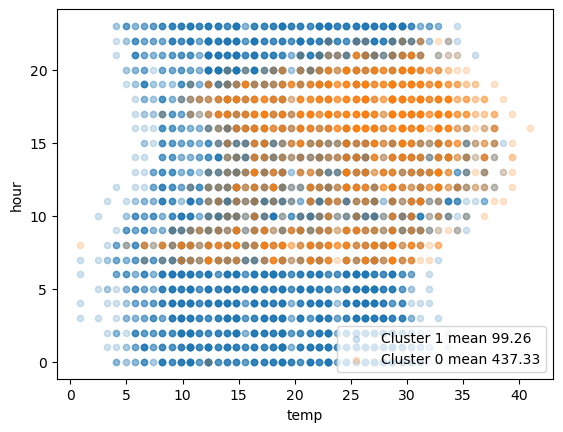

In [73]:
def showClusters(xlabel, ylabel, showLegend=False, sizeDependingOnLabel=None):
    clusters = bikes_enc['cluster'].unique()

    for cluster in clusters:
        CLUSTER_0_MEAN_COUNT = 437.33
        CLUSTER_1_MEAN_COUNT = 99.26

        name_count = {
            0: CLUSTER_0_MEAN_COUNT,
            1: CLUSTER_1_MEAN_COUNT
        }

        temp = bikes_enc[bikes_enc['cluster'] == cluster][xlabel]
        count = bikes_enc[bikes_enc['cluster'] == cluster][ylabel]
        size = 20 if sizeDependingOnLabel is None else bikes_enc[bikes_enc['cluster'] == cluster][sizeDependingOnLabel]
        plt.scatter(temp, count, label=f'Cluster {cluster} mean {name_count[cluster]}', alpha=0.2, s=size)

    plt.legend()
    if showLegend:
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.show()

showClusters('temp', 'hour', True)



In [74]:
# 6. (1 point) How many different rental periods are represented in each cluster?

bikes_enc.groupby('cluster')['hour'].head()

0     23
1      8
2      2
3     20
4     17
5     19
6     23
10    15
11    19
12    22
Name: hour, dtype: int64

In [75]:

bikes_enc.groupby('cluster')['hour'].nunique()

cluster
0    17
1    24
Name: hour, dtype: int64

In [76]:
"""
7. (4 points) Using averaged columns within each cluster, give a profile of a low-count rental period and
a high-count rental period. Why do you think fewer people are renting bikes in the low-count rental
period?
1https://www.kaggle.com/datasets/aguado/bike-rental-data-set-uci
"""

bikes_enc.groupby('cluster').mean()



,year,hour,workingday,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday_no,holiday_yes
cluster,,,,,,,,,,,,,,,,,
0,2011.675573,14.530057,0.661737,24.699761,28.459375,53.791508,13.743007,437.332061,0.252863,0.305821,0.349237,0.092080,0.033397,0.732347,0.234256,0.970420,0.029580
1,2011.428035,10.454318,0.683175,18.605922,21.911704,64.762024,12.449449,99.262650,0.249419,0.228679,0.216521,0.305382,0.092258,0.641337,0.266404,0.971214,0.028786


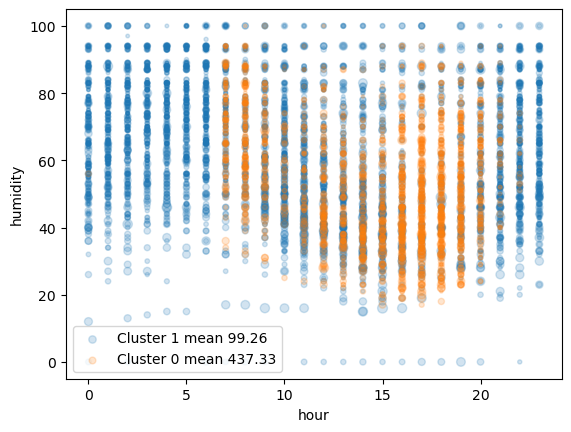

In [77]:
# Hour and count?

showClusters('hour', 'humidity', True, 'windspeed')

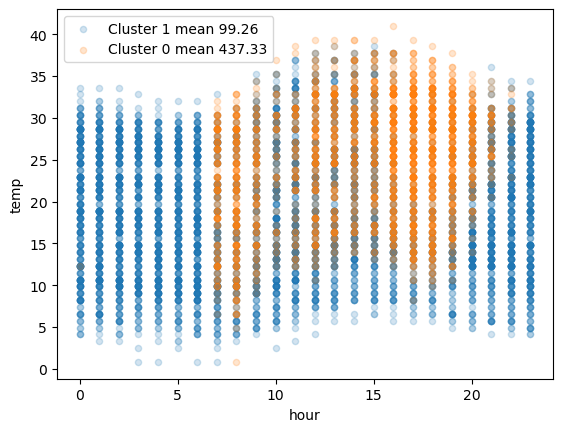

In [78]:
# Season winter.

showClusters('hour', 'temp', True)

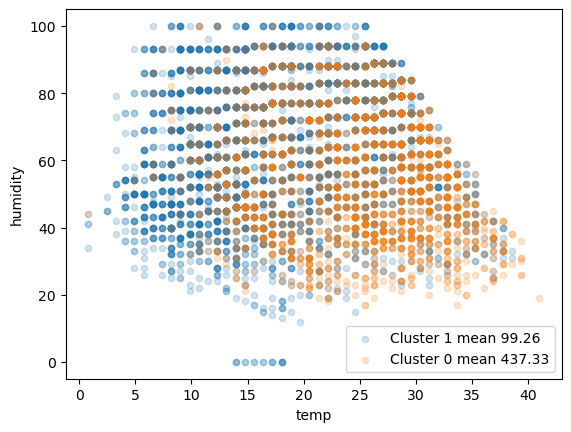

In [79]:
# Season winter.

showClusters('temp', 'humidity', True)

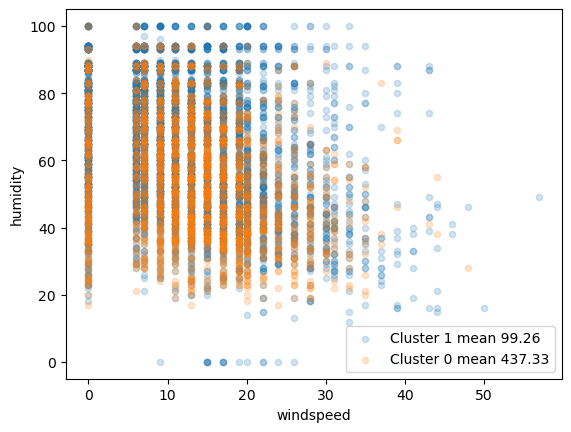

In [80]:
# Season winter.

showClusters('windspeed', 'humidity', True)

In [81]:
# Contrasting 
# 
# - temp
# - humidity
# - aTemp
# - windspeed
# - hour



In [82]:

# 1. Create a new DataFrame with the same index as the original dataset, but with a single column that contains the cluster label for each row.
kmeans = KMeans(n_clusters=3).fit(bikes_enc)
bikes_enc['cluster'] = kmeans.labels_
bikes_enc.head()

,year,hour,workingday,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday_no,holiday_yes,cluster
0,2012,23,0,23.78,27.275,73,11.0014,133,0,0,1,0,0,0,1,1,0,1
1,2011,8,0,27.88,31.820,57,0.0000,132,0,0,1,0,0,1,0,1,0,1
2,2012,2,1,20.50,24.240,59,0.0000,19,0,0,0,1,0,1,0,1,0,1
3,2011,20,1,25.42,28.790,83,19.9995,58,0,0,1,0,1,0,0,1,0,1
4,2011,17,1,26.24,28.790,89,0.0000,285,0,0,1,0,1,0,0,1,0,2


In [83]:
# Rental Periods.

bikes_enc.groupby('cluster')['hour'].nunique()

cluster
0    14
1    24
2    20
Name: hour, dtype: int64

In [84]:
# Check means.

bikes_enc.groupby('cluster').mean()

,year,hour,workingday,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday_no,holiday_yes
cluster,,,,,,,,,,,,,,,,,
0,2011.783669,14.794274,0.673383,25.676522,29.474841,52.091198,14.225002,566.600212,0.231177,0.325557,0.366914,0.076352,0.028632,0.766702,0.204666,0.972428,0.027572
1,2011.400583,8.979364,0.661811,17.489153,20.676526,67.343044,12.068318,59.625637,0.236465,0.217286,0.201020,0.345229,0.107793,0.622967,0.269240,0.969896,0.030104
2,2011.540921,14.460982,0.703083,22.680944,26.357680,56.510468,13.441771,263.388656,0.279026,0.273316,0.292729,0.154930,0.043776,0.697754,0.258470,0.972212,0.027788


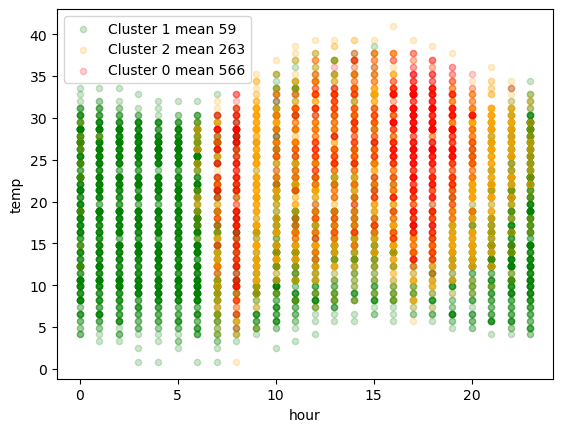

In [85]:
# Plot 
def showClusters(xlabel, ylabel, showLegend=False, sizeDependingOnLabel=None):
    clusters = bikes_enc['cluster'].unique()

    for cluster in clusters:
        CLUSTER_0_MEAN_COUNT = 566
        CLUSTER_1_MEAN_COUNT = 59
        CLUSTER_2_MEAN_COUNT = 263

        name_count = {
            0: CLUSTER_0_MEAN_COUNT,
            1: CLUSTER_1_MEAN_COUNT,
            2: CLUSTER_2_MEAN_COUNT
        }

        COLORS = {
            0: 'red',
            1: 'green',
            2: 'orange'
        }

        temp = bikes_enc[bikes_enc['cluster'] == cluster][xlabel]
        count = bikes_enc[bikes_enc['cluster'] == cluster][ylabel]
        size = 20 if sizeDependingOnLabel is None else bikes_enc[bikes_enc['cluster'] == cluster][sizeDependingOnLabel]
        plt.scatter(temp, count, label=f'Cluster {cluster} mean {name_count[cluster]}', alpha=0.2, s=size, c=COLORS[cluster])

    plt.legend()
    if showLegend:
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.show()

showClusters('hour', 'temp', True)



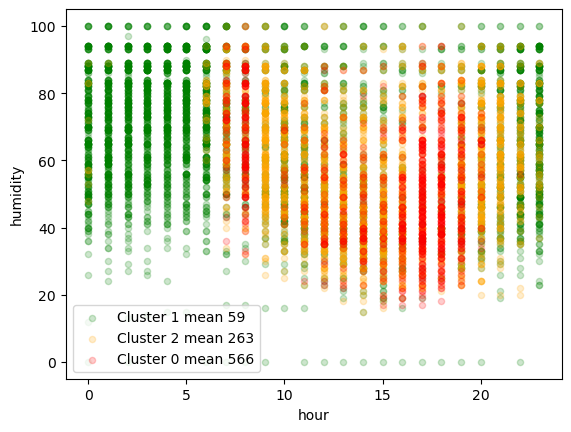

In [86]:
showClusters('hour', 'humidity', True)

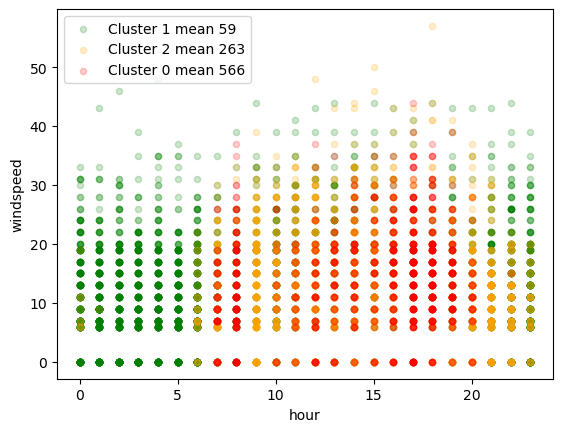

In [87]:
showClusters('hour', 'windspeed', True)

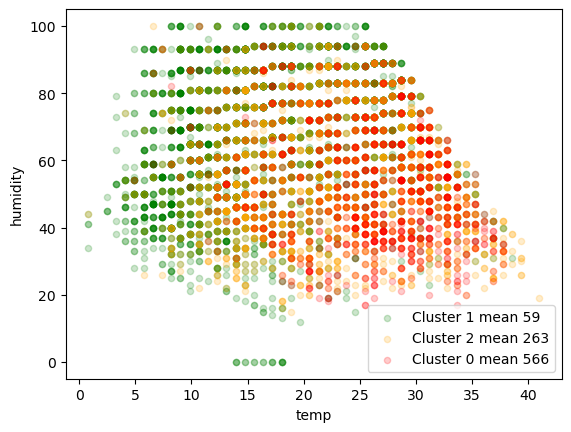

In [88]:
showClusters('temp', 'humidity', True)

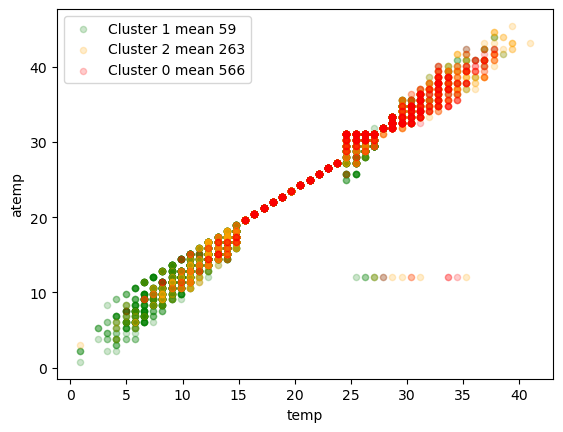

In [89]:
showClusters('temp', 'atemp', True)

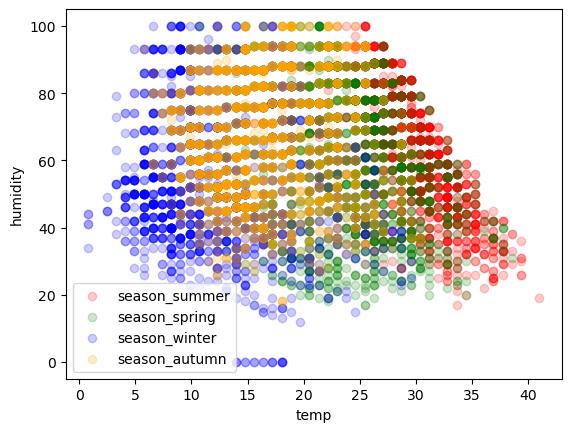

In [90]:
# Plot 
def showClustersByWeather(xlabel, ylabel, showLegend=False):
    SEASONS = ['season_summer', 'season_spring', 'season_winter', 'season_autumn']
    
    # climatic like colors
    COLORS = {
        'season_summer': 'red',
        'season_spring': 'green',
        'season_winter': 'blue',
        'season_autumn': 'orange'
    }
    weather_clusters = SEASONS

    for season in weather_clusters:

        data_A = bikes_enc[bikes_enc[season] == 1][xlabel]
        data_B = bikes_enc[bikes_enc[season] == 1][ylabel]
        plt.scatter(data_A, data_B, label=f'{season}', alpha=0.2, c=COLORS[season])

    plt.legend()
    if showLegend:
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.show()

showClustersByWeather('temp', 'humidity', True)



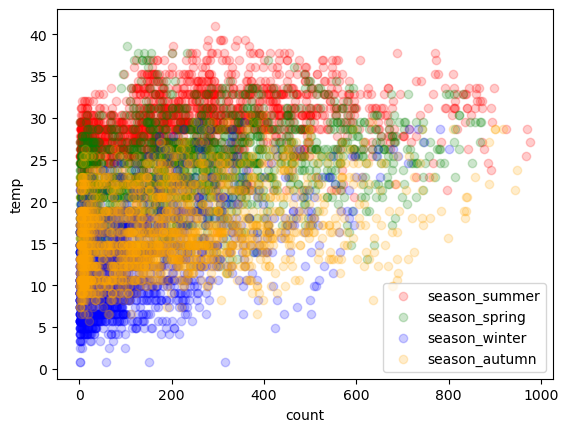

In [91]:

showClustersByWeather('count', 'temp', True)

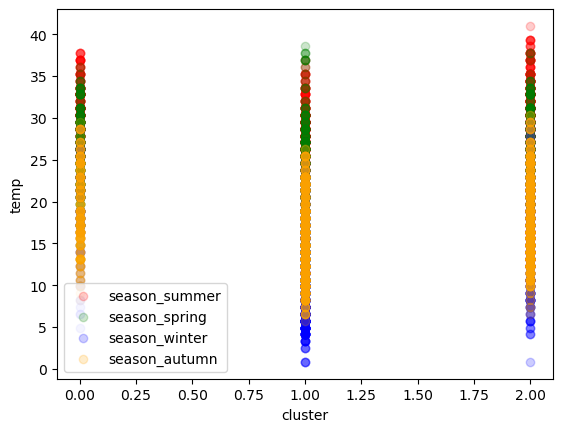

In [92]:

showClustersByWeather('cluster', 'temp', True)

1: 259840979.4357261
2: 85255465.52026427
3: 41432164.967970036
4: 25625914.706269767
5: 17934344.196127556
6: 13675481.811317358
7: 11133374.719218269
8: 9323937.190658879
9: 8241278.5353935845
10: 7425292.185672248


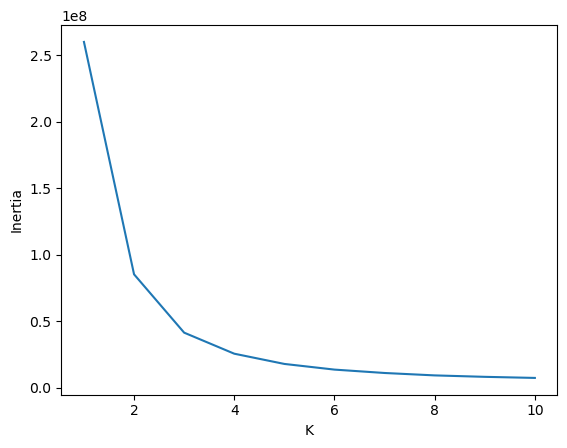

In [93]:

"""
Use the elbow method with inertia scores to approximate an ideal value of K. Once you have done this, perform a K-means clustering with this value of K you discovered (6 points). Answer the following questions:


11. (1 point) How many different rental periods are represented in each cluster?

https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/
"""

from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(bikes_enc)
    inertia.append(kmeans.inertia_)
    print(f'{k}: {kmeans.inertia_}')

plt.plot(range(1, 11), inertia)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()



In [94]:
"""
Elbow shape can be seen in 4. So we will use 4 clusters.
"""

kmeans = KMeans(n_clusters=4).fit(bikes_enc)
bikes_enc['cluster'] = kmeans.labels_
bikes_enc.head()


,year,hour,workingday,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday_no,holiday_yes,cluster
0,2012,23,0,23.78,27.275,73,11.0014,133,0,0,1,0,0,0,1,1,0,1
1,2011,8,0,27.88,31.820,57,0.0000,132,0,0,1,0,0,1,0,1,0,1
2,2012,2,1,20.50,24.240,59,0.0000,19,0,0,0,1,0,1,0,1,0,2
3,2011,20,1,25.42,28.790,83,19.9995,58,0,0,1,0,1,0,0,1,0,2
4,2011,17,1,26.24,28.790,89,0.0000,285,0,0,1,0,1,0,0,1,0,1


In [101]:

bikes_enc.groupby('cluster')['hour'].nunique()


cluster
0    16
1    20
2    24
3    12
Name: hour, dtype: int64

In [100]:
# Mean
bikes_enc.groupby('cluster').mean()['count']

cluster
0    388.654531
1    199.974887
2     44.215194
3    653.370809
Name: count, dtype: float64

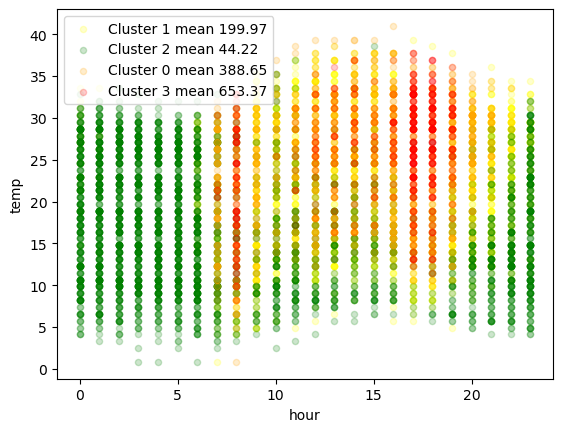

In [102]:
def showClusters(xlabel, ylabel, showLegend=False, sizeDependingOnLabel=None):
    clusters = bikes_enc['cluster'].unique()

    for cluster in clusters:
        """
        
        | cluster | Periods | Avg. Count | color  |
        | ------- | ------- | ---------- | ------ |
        | 0       | 16      | 388.654531 | orange |
        | 1       | 20      | 199.974887 | yellow |
        | 2       | 24      | 44.215194  | green  |
        | 3       | 12      | 653.370809 | red    |
        """

        name_count = {
            0: 388.65,
            1: 199.97,
            2: 44.22,
            3: 653.37
        }

        colors = {
            0: 'orange',
            1: 'yellow',
            2: 'green',
            3: 'red'
        }

        temp = bikes_enc[bikes_enc['cluster'] == cluster][xlabel]
        count = bikes_enc[bikes_enc['cluster'] == cluster][ylabel]
        size = 20 if sizeDependingOnLabel is None else bikes_enc[bikes_enc['cluster'] == cluster][sizeDependingOnLabel]
        plt.scatter(temp, count, label=f'Cluster {cluster} mean {name_count[cluster]}', alpha=0.2, s=size, color = colors[cluster])

    plt.legend()
    if showLegend:
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.show()

showClusters('hour', 'temp', True)



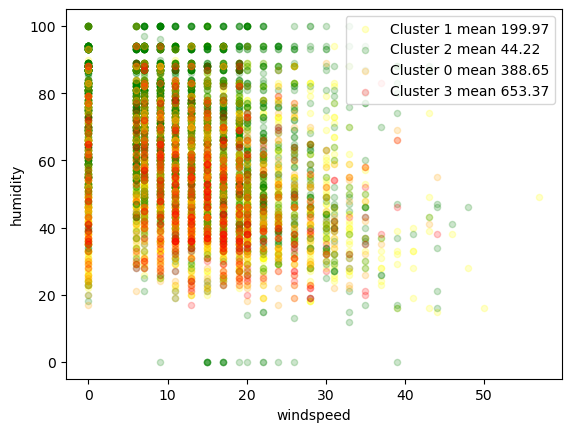

In [104]:

showClusters('windspeed', 'humidity', True)

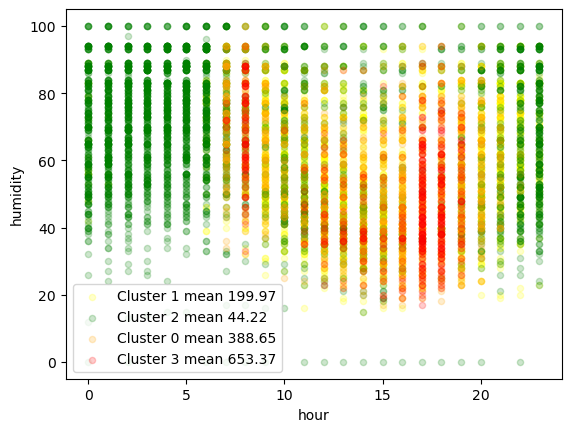

In [106]:

showClusters('hour', 'humidity', True)

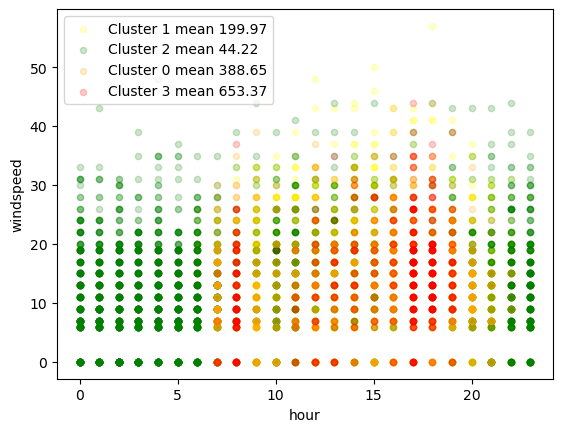

In [110]:

showClusters('hour', 'windspeed', True)